In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-05-20 15:41:27.088593: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-20 15:41:30.107233: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-20 15:41:30.108563: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 15:41:35.878503: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 3152 images belonging to 2 classes.


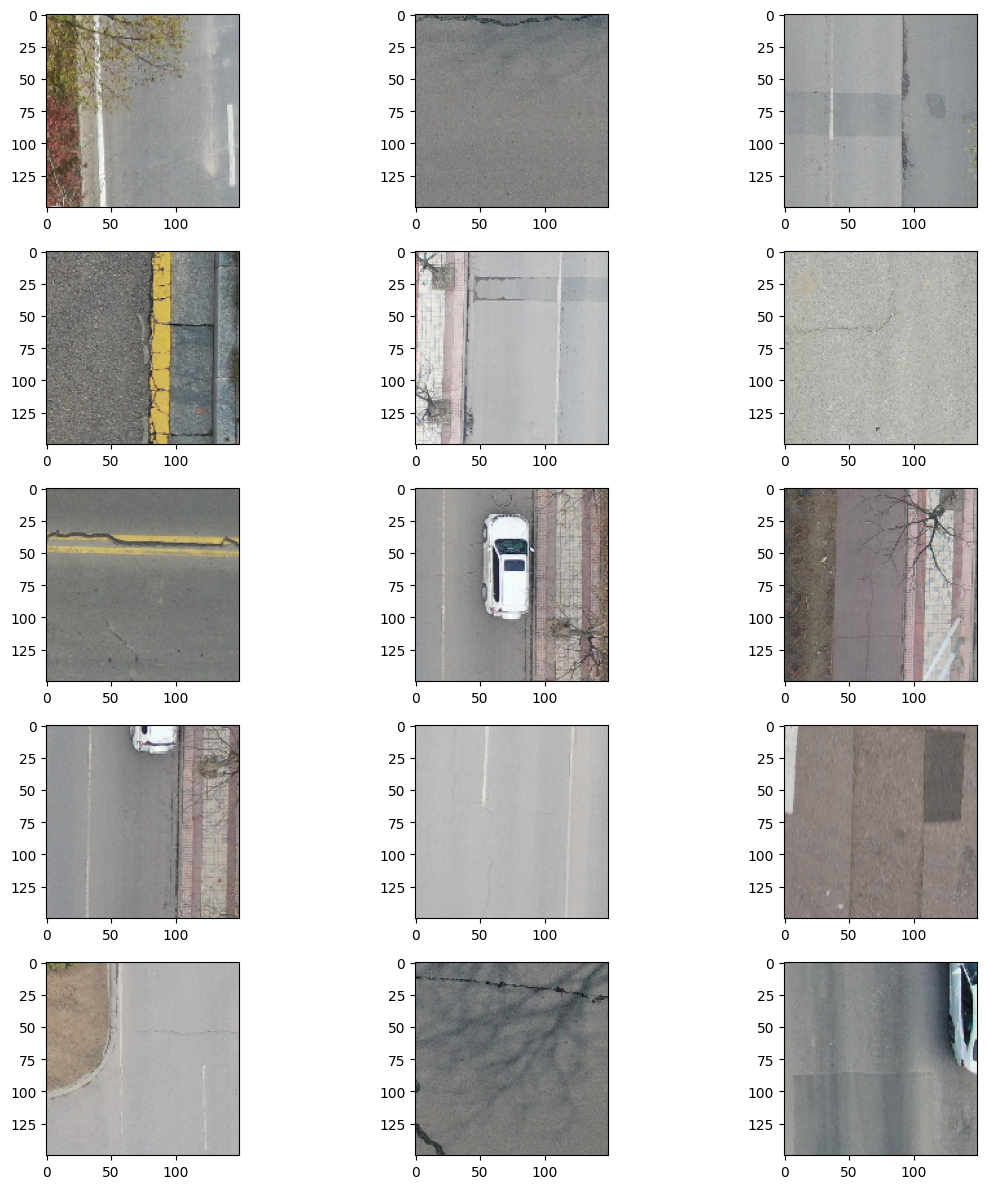

In [2]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
        'UAPD_final',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# Plotting the images
plt.figure(figsize=(12, 12))
for i in range(0, 15):
        plt.subplot(5, 3, i+1)
        for X_batch, Y_batch in train_generator:
                image = X_batch[0]
                plt.imshow(image)
                break
plt.tight_layout()
plt.show()

In [5]:
images = []
labels = []

for i in range(0, 15):
        for X_batch, Y_batch in train_generator:
                image = X_batch[0]
                label = Y_batch[0]
                images.append(image)
                labels.append(label)
                break
        
images = np.array(images)
labels = np.array(labels)

# Create a df
df = pd.DataFrame()
df['images'] = images.tolist()
df['labels'] = labels.tolist()

In [6]:
df.head()

,images,labels
0,"[[[0.6705882549285889, 0.6745098233222961, 0.6...",1.0
1,"[[[0.5333333611488342, 0.5333333611488342, 0.5...",1.0
2,"[[[0.6549019813537598, 0.6549019813537598, 0.6...",1.0
3,"[[[0.6039215922355652, 0.6117647290229797, 0.6...",1.0
4,"[[[0.4745098352432251, 0.4901961088180542, 0.4...",1.0


In [7]:
# We will now split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['images'], df['labels'], test_size=0.2, random_state=42)

In [9]:
# We will now create a model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# We will now train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).